# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [3]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
x_train.shape[1:]

(3072,)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    output = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer'+str(i+1))(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 0.01
MOMENTUM = 0.5
EPOCHS = 50
BATCH_SIZE = 256

In [10]:
# SGD
results = {}
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

# store result for each round
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']
results['SGD'] = {
    'train_loss': train_loss,
    'valid_loss': valid_loss,
    'train_acc': train_acc,
    'valid_acc': valid_acc
}

W0728 12:06:47.027487 140369385510784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0728 12:06:47.032761 140369385510784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 12:06:47.080300 140369385510784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 12:06:47.081758 140369385510784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W072

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer3 (Dense)        (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0728 12:06:47.452811 140369385510784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.9803 - acc: 0.2864 - val_loss: 1.9072 - val_acc: 0.2948
Epoch 2/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.8106 - acc: 0.3587 - val_loss: 1.7940 - val_acc: 0.3585
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7340 - acc: 0.3881 - val_loss: 1.7167 - val_acc: 0.3914
Epoch 4/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6846 - acc: 0.4048 - val_loss: 1.6351 - val_acc: 0.4296
Epoch 5/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.6422 - acc: 0.4221 - val_loss: 1.7703 - val_acc: 0.3733
Epoch 6/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.6089 - acc: 0.4327 - val_loss: 1.6686 - val_acc: 0.4054
Epoch 7/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5788 - acc: 0.4441 - val_loss: 1.

In [14]:
# Adam
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, decay=0.01, epsilon=None)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

# store result for each round
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']
results['Adam'] = {
    'train_loss': train_loss,
    'valid_loss': valid_loss,
    'train_acc': train_acc,
    'valid_acc': valid_acc
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer3 (Dense)        (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 279us/step - loss: 1

KeyboardInterrupt: ignored

In [16]:
# RMSprop
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, decay=0.0, epsilon=None)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

# store result for each round
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']
results['RMSprop'] = {
    'train_loss': train_loss,
    'valid_loss': valid_loss,
    'train_acc': train_acc,
    'valid_acc': valid_acc
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer3 (Dense)        (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 241us/step - loss: 1

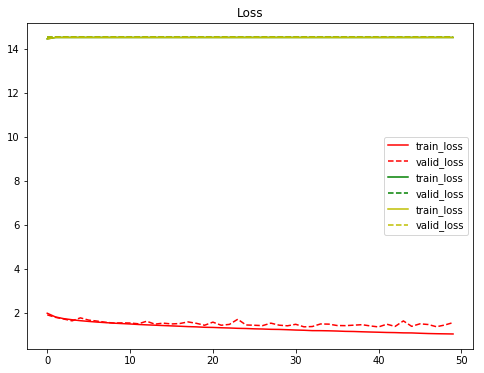

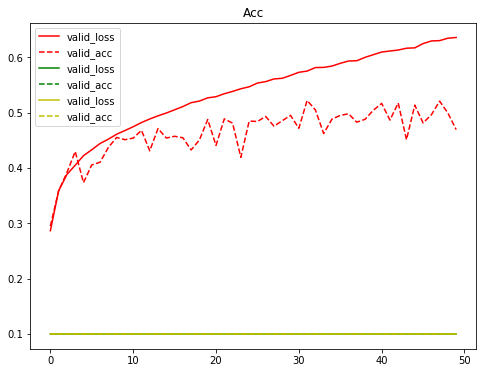

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['r', 'g', 'y']
opts = ['SGD', 'Adam', 'RMSprop']

plt.figure(figsize=(8,6))
for i, tag in enumerate(opts):
    plt.plot(range(len(results[tag]['train_loss'])), results[tag]['train_loss'], '-', label='train_loss', color=colors[i])
    plt.plot(range(len(results[tag]['valid_loss'])), results[tag]['valid_loss'], '--', label='valid_loss', color=colors[i])
plt.title('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i, tag in enumerate(opts):
    plt.plot(range(len(results[tag]['train_acc'])), results[tag]['train_acc'], '-', label='valid_loss', color=colors[i])
    plt.plot(range(len(results[tag]['valid_acc'])), results[tag]['valid_acc'], '--', label='valid_acc', color=colors[i])
plt.title('Acc')
plt.legend()
plt.show()